In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera_dataset_1w_10min.csv',parse_dates=['timestamp'])

In [15]:
df['Voc1_sim']= 758.00  - 2.426 * (df['Tmod_avg'] - 25.0)
df['Isc1_sim']= (101.42/2.0) * (df['Rad_avg'] / 1000.0)
df['Pa1_sim']= df['Voc1_sim'] * df['Isc1_sim'] * (59350.0/2.0) / ( (101.42/2.0)* 758.00)


df['Voc2_sim']= 759.20  - 2.87 * (df['Tmod_avg'] - 25.0)
df['Isc2_sim']= (117.60/2.0) * (df['Rad_avg'] / 1000.0)
df['Pa2_sim']= df['Voc2_sim'] * df['Isc2_sim'] * (66140.0/2.0) / ( (117.60/2.0) * 759.20)


In [16]:
RMSE = np.sqrt(mean_squared_error(df['Pa1'],df['Pa1_sim']))
MAE = mean_absolute_error(df['Pa1'],df['Pa1_sim'])
R2 = r2_score(df['Pa1'],df['Pa1_sim'])
print(RMSE,MAE, R2)

641.3626418499152 354.80665997544804 0.9946999284551301


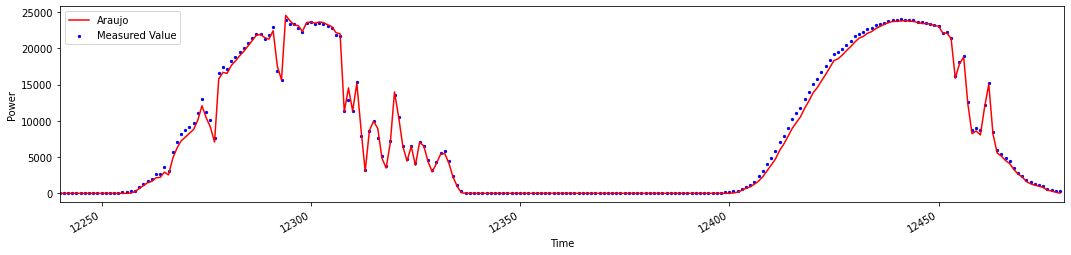

In [18]:
xplot_min = 12240
xplot_max = 12480

X = df.drop('Pa1', axis=1)
y = df['Pa1']

fig, axes = plt.subplots(figsize=(18, 4))
axes.scatter(X.index[xplot_min:xplot_max],y[xplot_min:xplot_max],color="blue",label="Measured Value",s=5)
axes.plot(X.index[xplot_min:xplot_max],df['Pa1_sim'][xplot_min:xplot_max], color="red",label="Araujo")
axes.legend()
axes.set_xlim(X.index[xplot_min],X.index[xplot_max])
axes.set_xlabel('Time')
axes.set_ylabel('Power')    

fig.autofmt_xdate()
plt.show()